In [ ]:
!pip install -q transformers datasets accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun May  4 22:03:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
from huggingface_hub import login
login()


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: aricccxu (tptrix29) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
from transformers import pipeline
print("\nEvaluating DistilBERT and TinyBERT on SST-2...\n")

# Load evaluation split
eval_ds = load_dataset("glue", "sst2", split="validation")

# Prepare texts and labels
texts = eval_ds["sentence"]
labels = eval_ds["label"]

# DistilBERT classifier
distil_pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)
distil_preds = distil_pipe(texts, truncation=True)
distil_correct = sum(int(pred["label"] == ("POSITIVE" if label == 1 else "NEGATIVE")) for pred, label in zip(distil_preds, labels))
distil_acc = distil_correct / len(labels)
print(f"DistilBERT Accuracy: {distil_acc:.4f}")

# TinyBERT classifier
tiny_pipe = pipeline("text-classification", model="philschmid/tiny-bert-sst2-distilled", device=0)
tiny_preds = tiny_pipe(texts, truncation=True)
tiny_correct = sum(int(pred["label"] == ("LABEL_1" if label == 1 else "LABEL_0")) for pred, label in zip(tiny_preds, labels))
tiny_acc = tiny_correct / len(labels)
print(f"TinyBERT Accuracy: {tiny_acc:.4f}")


Evaluating DistilBERT and TinyBERT on SST-2...



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


DistilBERT Accuracy: 0.9106


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


TinyBERT Accuracy: 0.0000


In [ ]:
tiny_model = "huawei-noah/TinyBERT_General_4L_312D"
tiny_pipe = pipeline("text-classification", model=tiny_model, tokenizer=tiny_model, device=0)
tiny_preds = tiny_pipe(texts, truncation=True)
tiny_correct = sum(int(pred["label"] == ("LABEL_1" if label == 1 else "LABEL_0")) for pred, label in zip(tiny_preds, labels))
tiny_acc = tiny_correct / len(labels)
print(f"TinyBERT (General) Accuracy: {tiny_acc:.4f}")

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

TinyBERT (General) Accuracy: 0.4633


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


100%|██████████| 2105/2105 [01:31<00:00, 23.08it/s]


Train Acc: 0.8845, Val Acc: 0.8796, Loss: 0.5516
Epoch 2/5


100%|██████████| 2105/2105 [01:31<00:00, 23.10it/s]


Train Acc: 0.9328, Val Acc: 0.8911, Loss: 0.3030
Epoch 3/5


100%|██████████| 2105/2105 [01:31<00:00, 23.09it/s]


Train Acc: 0.9512, Val Acc: 0.8933, Loss: 0.2128
Epoch 4/5


100%|██████████| 2105/2105 [01:31<00:00, 23.05it/s]


Train Acc: 0.9593, Val Acc: 0.8865, Loss: 0.1674
Epoch 5/5


100%|██████████| 2105/2105 [01:31<00:00, 23.08it/s]


Train Acc: 0.9657, Val Acc: 0.8899, Loss: 0.1387


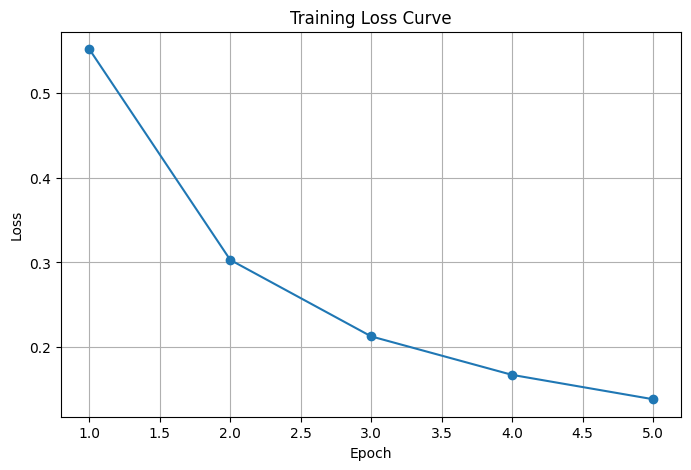


Distillation complete. Saving student model...


('/content/drive/MyDrive/HPML/bert_distilled/tokenizer_config.json',
 '/content/drive/MyDrive/HPML/bert_distilled/special_tokens_map.json',
 '/content/drive/MyDrive/HPML/bert_distilled/vocab.txt',
 '/content/drive/MyDrive/HPML/bert_distilled/added_tokens.json',
 '/content/drive/MyDrive/HPML/bert_distilled/tokenizer.json')

In [ ]:
# file: distill_bert_with_validation.py
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import get_scheduler
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gc
import os
import wandb

# Memory cleanup
gc.collect()
torch.cuda.empty_cache()

# Configuration
TEACHER_MODEL = "distilbert-base-uncased-finetuned-sst-2-english"
STUDENT_MODEL = "huawei-noah/TinyBERT_General_4L_312D"
SAVE_DIR = "/content/drive/MyDrive/HPML/bert_distilled"
DEVICE = "cuda"
BATCH_SIZE = 32
EPOCHS = 5
LR = 3e-5
TEMPERATURE = 2.0
ALPHA = 0.5
BETA = 0.5

# Load tokenizer, teacher and student models
teacher_tokenizer = AutoTokenizer.from_pretrained(TEACHER_MODEL)
teacher_model = AutoModelForSequenceClassification.from_pretrained(TEACHER_MODEL).to(DEVICE)
teacher_model.eval()

student_tokenizer = AutoTokenizer.from_pretrained(STUDENT_MODEL)
student_model = AutoModelForSequenceClassification.from_pretrained(STUDENT_MODEL, num_labels=2).to(DEVICE)

# Load SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Preprocessing
def preprocess(example):
    return teacher_tokenizer(example["sentence"], padding="max_length", truncation=True, max_length=128)

dataset = dataset.map(preprocess, batched=False)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Create DataLoaders
train_dataloader = DataLoader(dataset["train"], batch_size=BATCH_SIZE, shuffle=True)
validation_dataloader = DataLoader(dataset["validation"], batch_size=BATCH_SIZE)

# Optimizer and Scheduler
optimizer = AdamW(student_model.parameters(), lr=LR)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * EPOCHS)

# Init wandb
wandb.init(project="bert-distillation")

# Training Loop
loss_history = []
student_model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}/{EPOCHS}")
    correct = 0
    total = 0
    epoch_loss = 0.0
    for batch in tqdm(train_dataloader):
        input_ids = batch["input_ids"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["label"].to(DEVICE)

        with torch.no_grad():
            teacher_logits = teacher_model(input_ids=input_ids, attention_mask=attention_mask).logits

        student_outputs = student_model(input_ids=input_ids, attention_mask=attention_mask)
        student_logits = student_outputs.logits

        kd_loss = F.kl_div(
            F.log_softmax(student_logits / TEMPERATURE, dim=-1),
            F.softmax(teacher_logits / TEMPERATURE, dim=-1),
            reduction="batchmean"
        ) * (TEMPERATURE ** 2)

        ce_loss = F.cross_entropy(student_logits, labels)
        loss = ALPHA * ce_loss + BETA * kd_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        student_preds = torch.argmax(student_logits, dim=-1)
        correct += (student_preds == labels).sum().item()
        total += student_preds.size(0)
        epoch_loss += loss.item()

        wandb.log({"train/ce_loss": ce_loss.item(), "train/kd_loss": kd_loss.item(), "train/total_loss": loss.item()})

    train_accuracy = correct / total
    avg_loss = epoch_loss / len(train_dataloader)
    loss_history.append(avg_loss)
    wandb.log({"train/accuracy": train_accuracy, "train/avg_loss": avg_loss})

    # Validation evaluation
    student_model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in validation_dataloader:
            input_ids = batch["input_ids"].to(DEVICE)
            attention_mask = batch["attention_mask"].to(DEVICE)
            labels = batch["label"].to(DEVICE)

            outputs = student_model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=-1)
            val_correct += (preds == labels).sum().item()
            val_total += preds.size(0)

    val_accuracy = val_correct / val_total
    wandb.log({"eval/val_accuracy": val_accuracy})
    print(f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Loss: {avg_loss:.4f}")
    student_model.train()

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), loss_history, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig(os.path.join(SAVE_DIR, "distillation_loss_curve.png"))
plt.show()

# Save model
print("\nDistillation complete. Saving student model...")
student_model.save_pretrained(SAVE_DIR)
student_tokenizer.save_pretrained(SAVE_DIR)
